In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_CONFIG

In [ ]:
pip install psycopg2-binary

In [2]:
engine = create_engine(
    f"postgresql://{DB_CONFIG['user']}:{DB_CONFIG['password']}@{DB_CONFIG['host']}:{DB_CONFIG['port']}/{DB_CONFIG['database']}"
)

In [4]:
# Ambil data dari tabel 'asteroids'
df = pd.read_sql("SELECT * FROM asteroids", engine)

In [5]:
# Info awal
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                24 non-null     object 
 1   name              24 non-null     object 
 2   date              24 non-null     object 
 3   is_hazardous      24 non-null     bool   
 4   diameter_min_km   24 non-null     float64
 5   diameter_max_km   24 non-null     float64
 6   velocity_kph      24 non-null     float64
 7   miss_distance_km  24 non-null     float64
 8   orbiting_body     24 non-null     object 
dtypes: bool(1), float64(4), object(4)
memory usage: 1.6+ KB


,diameter_min_km,diameter_max_km,velocity_kph,miss_distance_km
count,24.000000,24.000000,24.000000,2.400000e+01
mean,0.088713,0.198368,45837.391975,3.887066e+07
std,0.138201,0.309026,28542.981572,2.454952e+07
min,0.003362,0.007517,7649.818418,5.138900e+06
25%,0.023968,0.053595,26940.581186,1.173725e+07
50%,0.035838,0.080137,36856.566822,3.952228e+07
75%,0.064477,0.144176,57949.558432,6.175744e+07
max,0.589597,1.318378,116420.486981,7.473016e+07


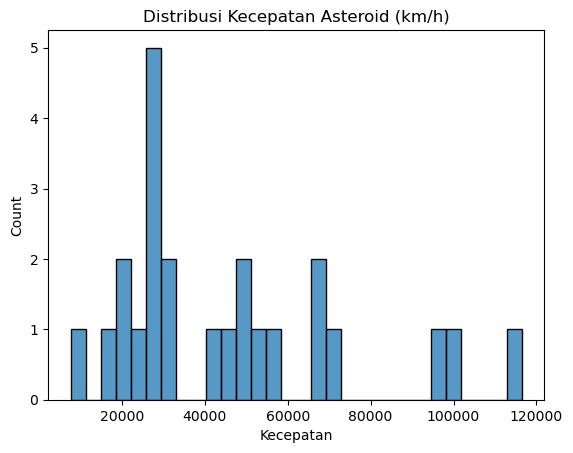

In [6]:
# Distribusi kecepatan
sns.histplot(df['velocity_kph'], bins=30)
plt.title("Distribusi Kecepatan Asteroid (km/h)")
plt.xlabel("Kecepatan")
plt.show()

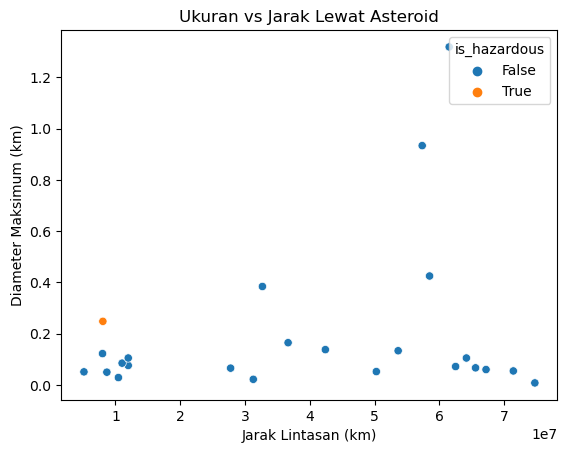

In [7]:
# Ukuran asteroid vs jarak
sns.scatterplot(data=df, x='miss_distance_km', y='diameter_max_km', hue='is_hazardous')
plt.title("Ukuran vs Jarak Lewat Asteroid")
plt.xlabel("Jarak Lintasan (km)")
plt.ylabel("Diameter Maksimum (km)")
plt.show()

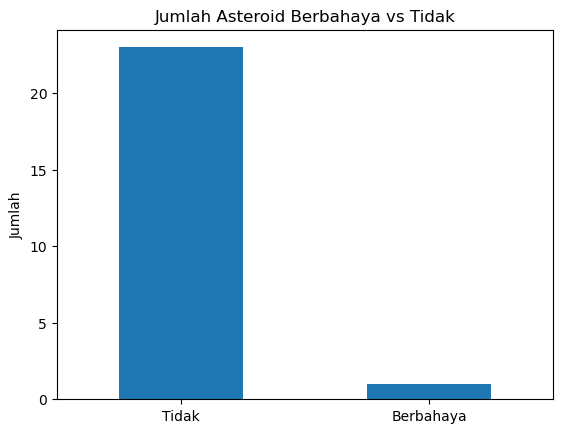

In [8]:
# Asteroid berbahaya
hazard_counts = df['is_hazardous'].value_counts()
hazard_counts.plot(kind='bar', title='Jumlah Asteroid Berbahaya vs Tidak')
plt.xticks([0, 1], ['Tidak', 'Berbahaya'], rotation=0)
plt.ylabel("Jumlah")
plt.show()